<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Let's-get-to-work!" data-toc-modified-id="Let's-get-to-work!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's get to work!</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sender-info" data-toc-modified-id="Sender-info-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Sender info</a></span></li><li><span><a href="#Sender-name" data-toc-modified-id="Sender-name-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Sender name</a></span></li><li><span><a href="#Dates" data-toc-modified-id="Dates-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Dates</a></span></li><li><span><a href="#Time-sent" data-toc-modified-id="Time-sent-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Time sent</a></span></li><li><span><a href="#Subject" data-toc-modified-id="Subject-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Subject</a></span></li></ul></li><li><span><a href="#Replace-in-pandas" data-toc-modified-id="Replace-in-pandas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Replace in pandas</a></span></li><li><span><a href="#Extract-in-pandas" data-toc-modified-id="Extract-in-pandas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extract in pandas</a></span></li><li><span><a href="#Split-in-pandas" data-toc-modified-id="Split-in-pandas-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split in pandas</a></span></li><li><span><a href="#findall-in-pandas" data-toc-modified-id="findall-in-pandas-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>findall in pandas</a></span></li></ul></li></ul></div>

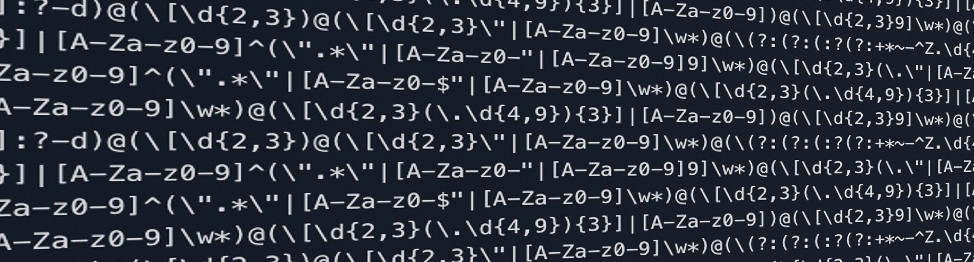

### Import libraries

In [93]:
import pandas as pd
import re

### Let's get to work!

In this example we are going to take an email and extract: 

- The person sending the email


- The person the email is sent to


- The date the email was sent


- The time the email was sent


- Subject of the email

In [94]:
# primero leemos el archivo con el que queremos trabajar
email = open("data/emails.txt", "r").read()

In [98]:
# vamos a coger uno de los emails y sobre este trabajaremos

email = '''
Thu Oct 31 08:11:39 2002
Return-Path: <bensul2004nng@spinfinder.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <bensul2004nng@spinfinder.com>
Message-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
Date: Thu, 31 Oct 2002 05:10:00
To: R@M
Subject: URGENT ASSISTANCE /RELATIONSHIP (P)
MIME-Version: 1.0
Content-Type: text/plain;charset="iso-8859-1"
Content-Transfer-Encoding: 7bit
Status: O

Dear Friend,

I am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.

After the sudden death of the former Head of state of Nigeria General Sanni Abacha on June 8th 1998 his aides and immediate members of his family were arrested while trying to escape from Nigeria in a Chartered jet to Saudi Arabia with 6 trunk boxes Marked "Diplomatic Baggage". Acting on a tip-off as they attempted to board the Air Craft,my officials carried out a thorough search on the air craft and discovered that the 6 trunk boxes contained foreign currencies amounting to US$197,570,000.00(One Hundred and  Ninety-Seven Million Five Hundred Seventy Thousand United States Dollars).

I declared only (5) five boxes to the government and withheld one (1) in my custody containing the sum of (US$30,000,000.00) Thirty Million United States Dollars Only, which has been disguised to prevent their being discovered during transportation process.Due to several media reports on the late head of state about all the money him and his co-government officials stole from our government treasury amounting
to US$55 Billion Dollars (ref:ngrguardiannews.com) of July 2nd 1999. Even the London times of July 1998 reported that General Abacha has over US$3.Billion dollars in one account overseas. We decided to conceal this one (1)box till the situation is calm and quite on the issue. The box was thus deposited with a security company here in Nigeria and tagged as "Precious Stones and Jewellry" in other that its
content will not be discovered. Now that all is calm, we (myself and two of my colleagues in the operations team) are now ready to move this box out of the country through a diplomatic arrangement which is the safest means. 

However as government officials the Civil Service Code of Conduct does not allow us by law to operate any foreign account or own foreign investment and the amount of money that can be found in our account
cannot be more than our salary on the average, thus our handicapp and our need for your assistance to help collect and keep safely in your account this money.

Therefore we want you to assist us in moving this money out of Nigeria. We shall definitely compensate you handsomely for the assistance. We can do this by instructing the Security Company here in Nigeria to
move the consignment to their affiliate branch office outside Nigeria through diplomatic means and the consignment will be termed as Precious Stones and Jewelleries" which you bought during your visit to Nigeria and is being transfered to your country from here for safe keeping. Then we can arrange to meet at the destination country to take the delivery of the consignment. You will thereafter open an account there and lodge the Money there and gradually instruct remittance to your Country. 

This business is 100% risk free for you so please treat this matter with utmost confidentiality .If you indicate your interest to assist us please just e-mail me for more Explanation on how we plan to execute the transaction.

Expecting your response urgently.

Best regards,

Mr. Ben Suleman

'''

In [99]:
# vamos a crear un diccionario vacío sobre el que iremos guardando todos los resultados 
email_info = {}

##### Sender info

In [100]:
# Buscamos todos los elementos que tengan From

info_sender = re.findall('From:.*',email)
info_sender

['From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>']

In [102]:
# definimos el patrón para sacar el email

pattern_send = r"[\w]+@[\w\.]*"

In [103]:
email_info["sender_email"]=[]

res = re.findall(pattern_send,info_sender[0])
if res:
    email_info["sender_email"].append(res[0])
else:
    email_info["sender_email"].append('No info')

In [104]:
email_info

{'sender_email': ['bensul2004nng@spinfinder.com']}

#####  Sender name

In [19]:
info_sender

['From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>']

In [20]:
pattern_sender = r".*<"

In [21]:

res2 = re.findall(pattern_sender, info_sender[0])
print(res2)

['From: "Mr. Ben Suleman" <']


In [22]:
res2[0].split()

['From:', '"Mr.', 'Ben', 'Suleman"', '<']

In [23]:
res2[0].split()[1:-1]

['"Mr.', 'Ben', 'Suleman"']

In [27]:
" ".join(res2[0].split()[1:-1]).replace('"', "")

'Mr. Ben Suleman'

In [79]:
email_info["sender_name"]=[]

res = re.findall(pattern_sender,info_sender[0])
if res:
    email_info["sender_name"].append(' '.join(res[0].split()[1:-1]))
else:
    email_info["sender_name"].append('No info')

In [80]:
email_info

{'sender_email': ['bensul2004nng@spinfinder.com'],
 'sender_name': ['"Mr. Ben Suleman"'],
 'date_sent': ['31 Oct 2002'],
 'time_sent': ['05:10:00'],
 'subject': ['URGENT ASSISTANCE /RELATIONSHIP (P)']}

##### Dates

In [33]:
print(email)


Thu Oct 31 08:11:39 2002
Return-Path: <bensul2004nng@spinfinder.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <bensul2004nng@spinfinder.com>
Message-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
Date: Thu, 31 Oct 2002 05:10:00
To: R@M
Subject: URGENT ASSISTANCE /RELATIONSHIP (P)
MIME-Version: 1.0
Content-Type: text/plain;charset="iso-8859-1"
Content-Transfer-Encoding: 7bit
Status: O

Dear Friend,

I am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.

After the sudden death of the former Head of state of Nigeria General Sanni Abacha on June 8th 1998 his aides and immediate members of his family were arrested while trying to escape from Nigeria in a Chartered jet to Saudi Arabia with 6 trunk boxes Marked "Diplomatic Baggage". Acting on a tip-off as they att

In [34]:
dates = re.findall(r"Date:.*",email)
dates

['Date: Thu, 31 Oct 2002 05:10:00']

In [35]:
pattern_date = r"\d+\s\w{3}\s\d+"

In [37]:
res3 = re.findall(pattern_date, dates[0])
res3

['31 Oct 2002']

In [47]:
email_info["date_sent"] = []

fecha = re.findall(pattern_date, dates[0])

if fecha:
    email_info["date_sent"].append(fecha[0])
else:
    email_info["date_sent"].append('No info')

31 Oct 2002


In [48]:
email_info

{'sender_email': ['bensul2004nng@spinfinder.com'],
 'sender_name': ['Mr. Ben Suleman'],
 'date_sent': ['31 Oct 2002']}

##### Time sent

In [49]:
print(email)


Thu Oct 31 08:11:39 2002
Return-Path: <bensul2004nng@spinfinder.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <bensul2004nng@spinfinder.com>
Message-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
Date: Thu, 31 Oct 2002 05:10:00
To: R@M
Subject: URGENT ASSISTANCE /RELATIONSHIP (P)
MIME-Version: 1.0
Content-Type: text/plain;charset="iso-8859-1"
Content-Transfer-Encoding: 7bit
Status: O

Dear Friend,

I am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.

After the sudden death of the former Head of state of Nigeria General Sanni Abacha on June 8th 1998 his aides and immediate members of his family were arrested while trying to escape from Nigeria in a Chartered jet to Saudi Arabia with 6 trunk boxes Marked "Diplomatic Baggage". Acting on a tip-off as they att

In [51]:
dates

['Date: Thu, 31 Oct 2002 05:10:00']

In [50]:
pattern_time = r"\d{2}:\d{2}:\d{2}"

In [54]:

hora = re.findall(pattern_time, dates[0])
hora

['05:10:00']

In [58]:
email_info['time_sent']=[]

hora = re.findall(pattern_time,dates[0])
if hora:
    email_info['time_sent'].append(hora[0])
else:
    email_info['time_sent'].append('No info')

In [59]:
email_info

{'sender_email': ['bensul2004nng@spinfinder.com'],
 'sender_name': ['Mr. Ben Suleman'],
 'date_sent': ['31 Oct 2002'],
 'time_sent': ['05:10:00']}

##### Subject

In [60]:
print(email)


Thu Oct 31 08:11:39 2002
Return-Path: <bensul2004nng@spinfinder.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <bensul2004nng@spinfinder.com>
Message-Id: <200210311310.g9VDANt24674@bloodwork.mr.itd.UM>
From: "Mr. Ben Suleman" <bensul2004nng@spinfinder.com>
Date: Thu, 31 Oct 2002 05:10:00
To: R@M
Subject: URGENT ASSISTANCE /RELATIONSHIP (P)
MIME-Version: 1.0
Content-Type: text/plain;charset="iso-8859-1"
Content-Transfer-Encoding: 7bit
Status: O

Dear Friend,

I am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.

After the sudden death of the former Head of state of Nigeria General Sanni Abacha on June 8th 1998 his aides and immediate members of his family were arrested while trying to escape from Nigeria in a Chartered jet to Saudi Arabia with 6 trunk boxes Marked "Diplomatic Baggage". Acting on a tip-off as they att

In [62]:
asunto=re.findall(r"Subject:.*",email)
asunto

['Subject: URGENT ASSISTANCE /RELATIONSHIP (P)']

In [68]:
pattern_subject = r":.*"

In [69]:

res6 = re.findall(pattern_subject, asunto[0])
res6

[': URGENT ASSISTANCE /RELATIONSHIP (P)']

In [72]:
email_info["subject"]=[]

asun = re.findall(pattern_subject, asunto[0])
if asun:
    email_info["subject"].append(asun[0][2:])
else:
    email_info["subject"].append('No info')

In [73]:
email_info

{'sender_email': ['bensul2004nng@spinfinder.com'],
 'sender_name': ['Mr. Ben Suleman'],
 'date_sent': ['31 Oct 2002'],
 'time_sent': ['05:10:00'],
 'subject': ['URGENT ASSISTANCE /RELATIONSHIP (P)']}

Ok... we have all the information in a dicctionary 💪

**The next step is create a pandas dataframe with this dicctionary**

In [74]:
email_info.keys()

dict_keys(['sender_email', 'sender_name', 'date_sent', 'time_sent', 'subject'])

In [81]:
df = pd.DataFrame.from_dict(email_info, orient='index')

In [82]:
df.head()

,0
sender_email,bensul2004nng@spinfinder.com
sender_name,"""Mr. Ben Suleman"""
date_sent,31 Oct 2002
time_sent,05:10:00
subject,URGENT ASSISTANCE /RELATIONSHIP (P)


In [83]:
df2 = df.T
df2

,sender_email,sender_name,date_sent,time_sent,subject
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P)


#### Replace in pandas

How to replace a string in pandas?

In pandas we have the `str.replace` method that allows us to repalce each ocurrence of pattern/regex in the Series 

More info [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html)

In [84]:
# Replace a Specific Character under a Single DataFrame Column
df2['sender_name2'] = df2['sender_name'].str.replace('"','')

In [85]:
df2.head()

,sender_email,sender_name,date_sent,time_sent,subject,sender_name2
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P),Mr. Ben Suleman


#### Extract in pandas

In [87]:
df2['Year'] = df2['date_sent'].str.extract(r'(\d{4})')
df2

,sender_email,sender_name,date_sent,time_sent,subject,sender_name2,Year
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P),Mr. Ben Suleman,2002


#### Split in pandas

In [105]:
df2[["tim", "hol", "lol"]] = df2["time_sent"].str.split(r":",expand=True)

In [106]:
df2

,sender_email,sender_name,date_sent,time_sent,subject,sender_name2,Year,tim,hol,lol,month
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P),Mr. Ben Suleman,2002,05,10,00,Oct


#### findall in pandas

In [90]:
pattern = r"[A-Z].{3}"
df2['month'] = df2["date_sent"].apply(lambda x: re.findall(pattern, str(x)))
df2.head()

,sender_email,sender_name,date_sent,time_sent,subject,sender_name2,Year,tim,hol,lol,month
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P),Mr. Ben Suleman,2002,05,10,00,[Oct ]


In [91]:
df2["month"] = df2["month"].explode()

In [92]:
df2

,sender_email,sender_name,date_sent,time_sent,subject,sender_name2,Year,tim,hol,lol,month
0,bensul2004nng@spinfinder.com,"""Mr. Ben Suleman""",31 Oct 2002,05:10:00,URGENT ASSISTANCE /RELATIONSHIP (P),Mr. Ben Suleman,2002,05,10,00,Oct
